## Subplots

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default") # use default style for plots

# Load the sample diamonds data
df = pd.read_csv('../00_datasets/diamonds.csv')

# Display the first few rows of the dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


         cut         mean  median
0       Fair  4358.757764  3282.0
1       Good  3928.864452  3050.5
2      Ideal  3457.541970  1810.0
3    Premium  4584.257704  3185.0
4  Very Good  3981.759891  2648.0


<Figure size 1000x600 with 0 Axes>

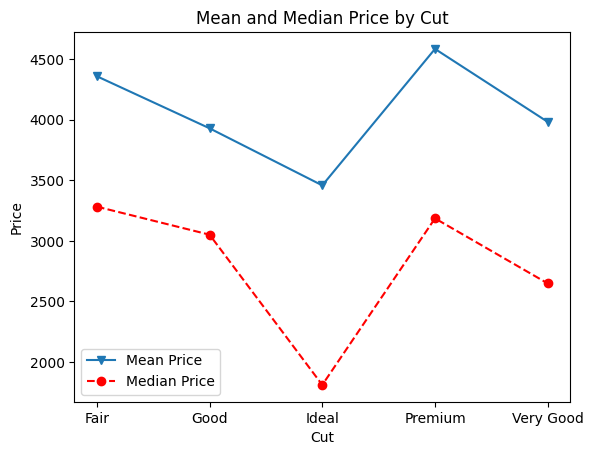

In [26]:
plt.rcParams.update(plt.rcParamsDefault) # reset settings of plt
# plt.style.use('default') # use default style

# groupby the 'cut' column and calculate the mean and median price for each cut
cut_price_stats = df.groupby('cut')['price'].agg(['mean', 'median']).reset_index()
print(cut_price_stats)

# line plot for cut on x and mean/median on y
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.plot(cut_price_stats['cut'], cut_price_stats['mean'], label='Mean Price', marker='v')
ax.plot(cut_price_stats['cut'], cut_price_stats['median'], label='Median Price', marker='o', color='red', linestyle='--')
ax.set_title('Mean and Median Price by Cut')
ax.set_xlabel('Cut')
ax.set_ylabel('Price')
ax.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

# plot time-series data

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


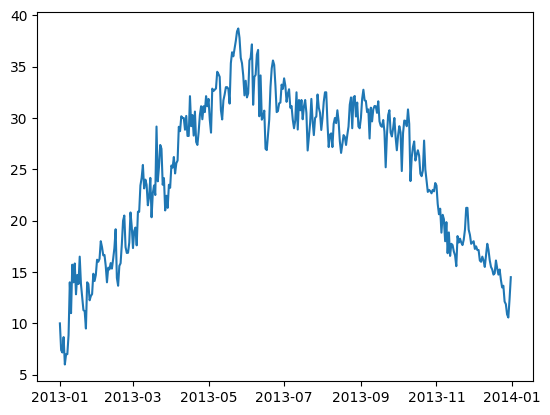

In [27]:
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('../00_datasets/DailyClimateTrain.csv', parse_dates=['date'], index_col='date')
print(climate_change.head())

climate_change_2013 = climate_change["2013-01-01": "2013-12-31"] 
# climate_change_2013 = climate_change[climate_change.index.year == 2013] # # same as above

plt.plot(climate_change_2013.index, climate_change_2013['meantemp'])
plt.show()

## 2 y-axis in single plot for time-series

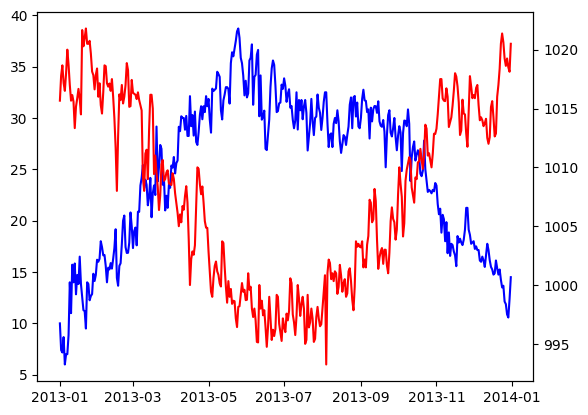

In [28]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

ax.plot(climate_change_2013.index, climate_change_2013['meantemp'], color='b') # Plot the mean temperature in blue
ax2 = ax.twinx() # Create a twin Axes that shares the x-axis
ax2.plot(climate_change_2013.index, climate_change_2013['meanpressure'], color='r') # Plot the mean pressure in red

plt.show()

## Defining a function that plots time-series data

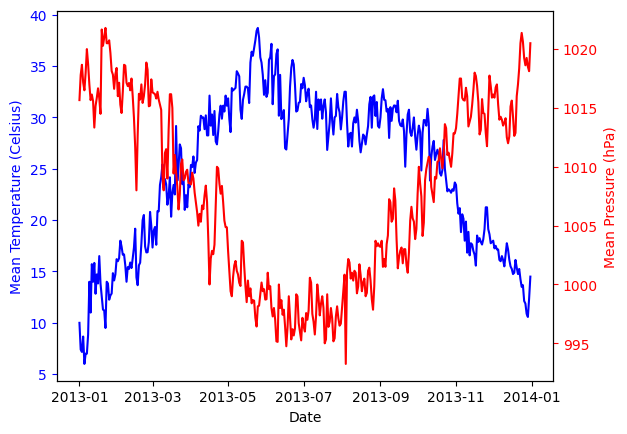

In [29]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  axes.plot(x, y, color=color) # Plot the inputs x,y in the provided color
  axes.set_xlabel(xlabel) # Set the x-axis label
  axes.set_ylabel(ylabel, color=color) # Set the y-axis label
  axes.tick_params('y', colors=color) # Set the colors tick params for y-axis

fig, ax = plt.subplots()

plot_timeseries(ax, climate_change_2013.index, climate_change_2013['meantemp'], "blue", "Date", "Mean Temperature (Celsius)")
ax2 = ax.twinx() # Create a twin Axes object that shares the x-axis
plot_timeseries(ax2, climate_change_2013.index, climate_change_2013['meanpressure'], "red", "Date", "Mean Pressure (hPa)")

plt.show()

## Annotation

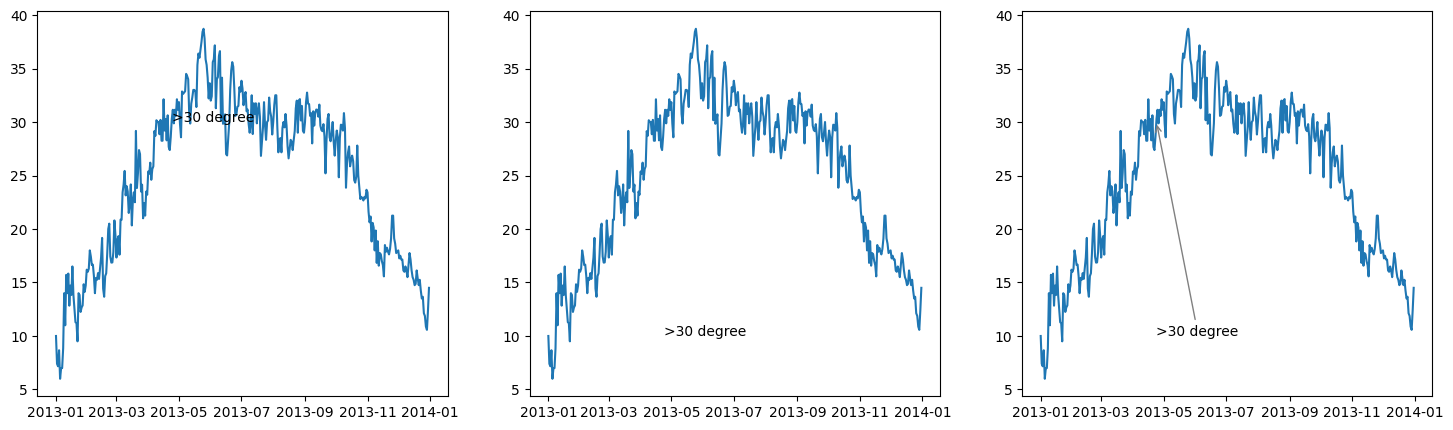

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True) # Create a figure with 3 subplots sharing the x-axis

# Plot the relative temperature data
ax[0].plot(climate_change_2013.index, climate_change_2013['meantemp'])
ax[1].plot(climate_change_2013.index, climate_change_2013['meantemp'])
ax[2].plot(climate_change_2013.index, climate_change_2013['meantemp'])

# Annotate the date at which temperatures exceeded 30 degree
ax[0].annotate('>30 degree', # text of the annotation
            xy=(pd.Timestamp('2013-04-24'), 30), # x,y coordinates of the annotation
            )

ax[1].annotate('>30 degree', # text of the annotation
            xy=(pd.Timestamp('2013-04-24'), 30), # x,y coordinates of the annotation
            xytext=(pd.Timestamp('2013-04-24'), 10), # x,y coordinates of the text
            )

ax[2].annotate('>30 degree', # text of the annotation
            xy=(pd.Timestamp('2013-04-24'), 30), # x,y coordinates of the annotation
            xytext=(pd.Timestamp('2013-04-24'), 10), # x,y coordinates of the text
            # arrowprops={} # arrow pointing towards coordinates of annotation
            arrowprops={'arrowstyle': '->', 'color': 'gray'} # customize arrow
            )
plt.show()

## Adding error-bars to a plot

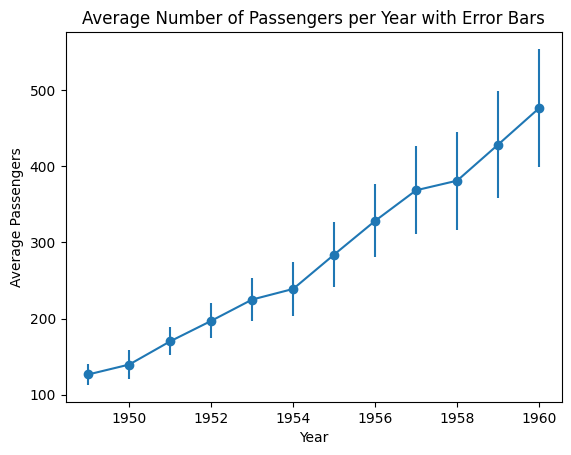

In [31]:
# import csv
flights = pd.read_csv('../00_datasets/flights.csv')
flights_grouped = flights.groupby('year')['passengers'].agg(['mean', 'std']).reset_index()

plt.errorbar(flights_grouped['year'], flights_grouped['mean'], marker='o', yerr=flights_grouped['std'])
plt.title('Average Number of Passengers per Year with Error Bars')
plt.xlabel('Year')
plt.ylabel('Average Passengers')
plt.show()

## Bar Plot

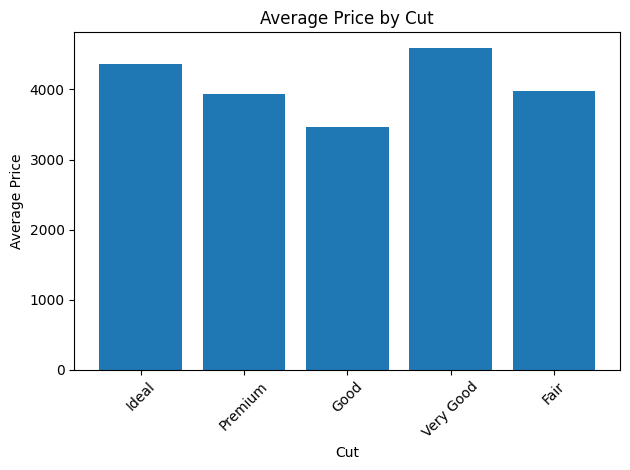

In [37]:
plt.bar(df['cut'].unique(), 
        df.groupby('cut')['price'].mean(),
        # color=['blue', 'orange', 'green', 'red', 'purple']
        )

plt.title('Average Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

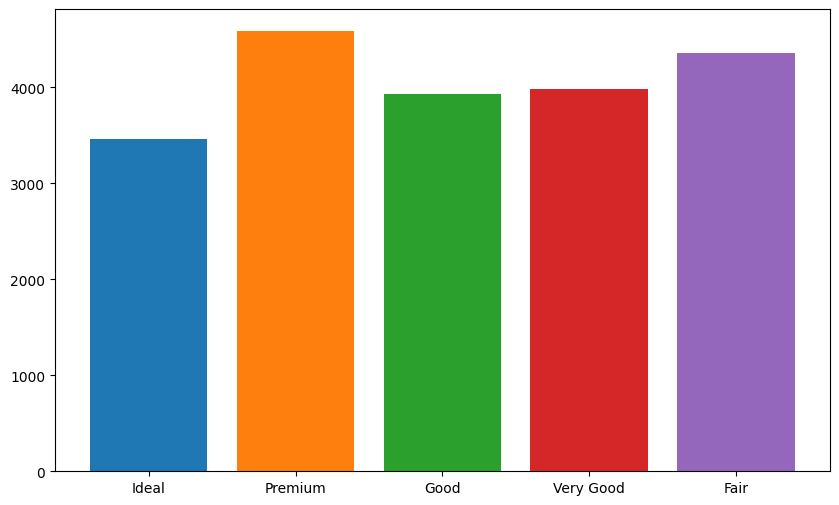

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

unique_cuts = df['cut'].unique()
for cut in unique_cuts:
    subset = df[df['cut'] == cut]
    ax.bar(cut, subset['price'].mean())

plt.show()

### Grouped stacked bar plot

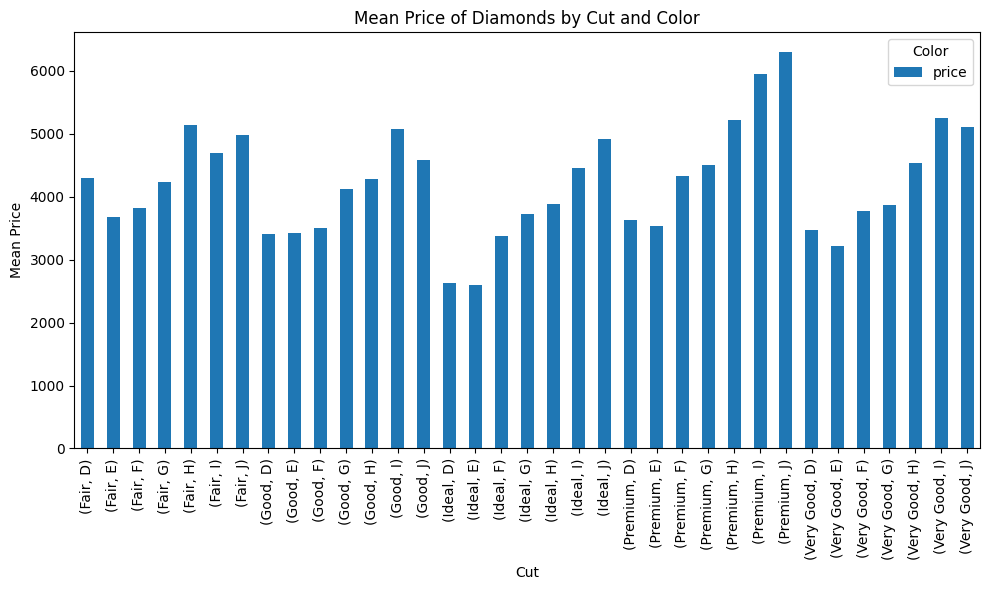

In [12]:
# create a stacked bar chart with the mean price of diamonds by cut and color
cut_color_price = df.groupby(['cut', 'color'])['price'].mean()
# print(cut_color_price)

cut_color_price.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mean Price of Diamonds by Cut and Color')
plt.xlabel('Cut')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
# set legend for the color and cut
plt.legend(title='Color') # bbox_to_anchor=(1.05, 1), loc='upper left'
plt.tight_layout()
plt.show()

### Stacked bar plot

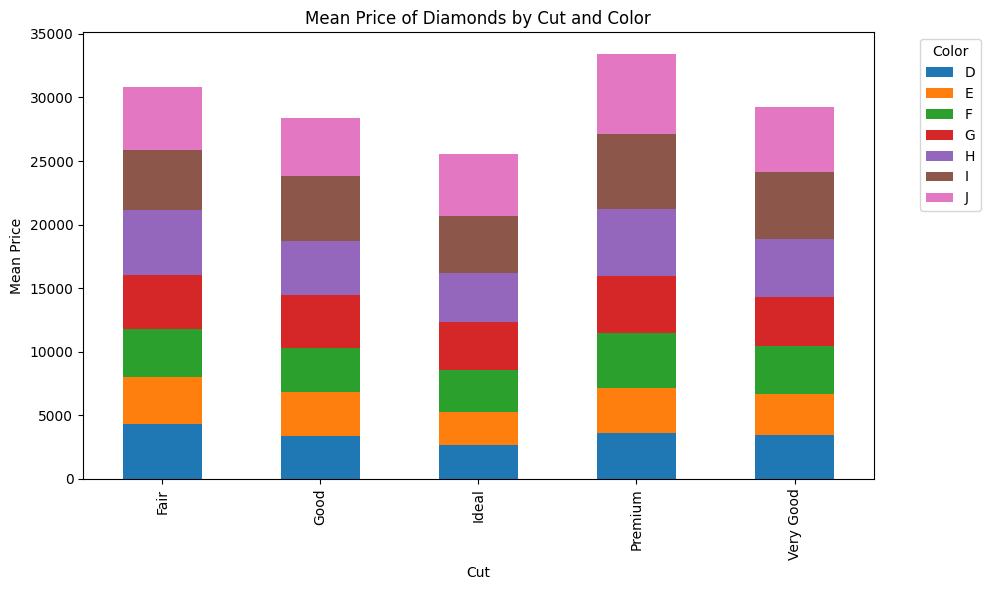

In [13]:
# create a stacked bar chart with the mean price of diamonds by cut and color
cut_color_price = df.groupby(['cut', 'color'])['price'].mean().unstack()
# print(cut_color_price)

cut_color_price.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mean Price of Diamonds by Cut and Color')
plt.xlabel('Cut')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_76918/3575027092.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(medals.index, rotation=90)


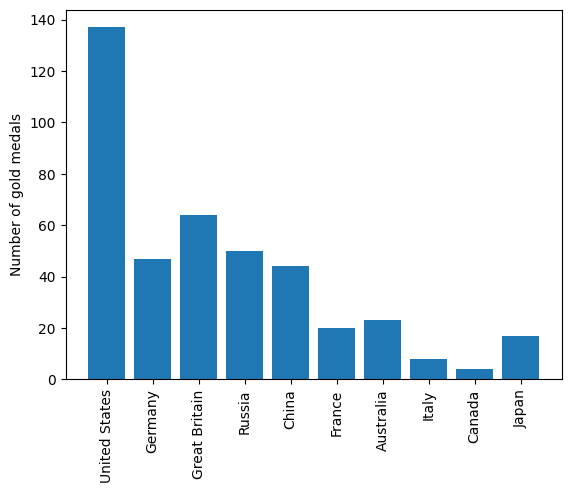

In [14]:
medals = pd.read_csv('../00_datasets/medals.csv', index_col=0)

fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of gold medals")
plt.show()

/tmp/ipykernel_76918/3380369441.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(medals.index, rotation=45) # Rotate x-axis labels for better readability


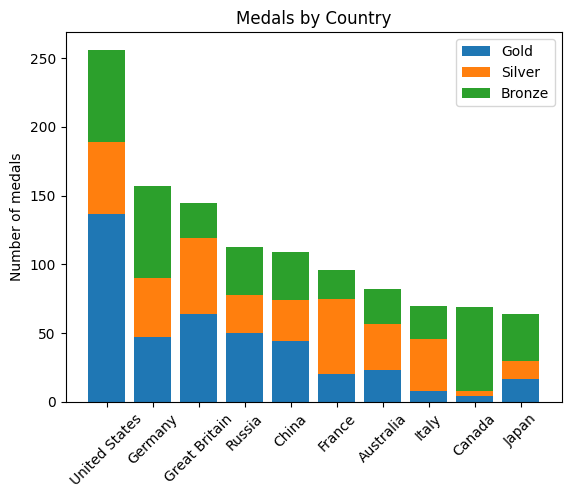

In [15]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals['Gold'], label='Gold') # Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver') # Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold']+medals['Silver'], label='Bronze') # Stack bars for "Bronze" on top of that with label "Bronze"

ax.set_ylabel("Number of medals") # Set the y-axis label
ax.set_title("Medals by Country") # Set the title of the plot
ax.set_xticklabels(medals.index, rotation=45) # Rotate x-axis labels for better readability
ax.legend() # Display the legend
plt.show()

## Adding error bars to bar plot

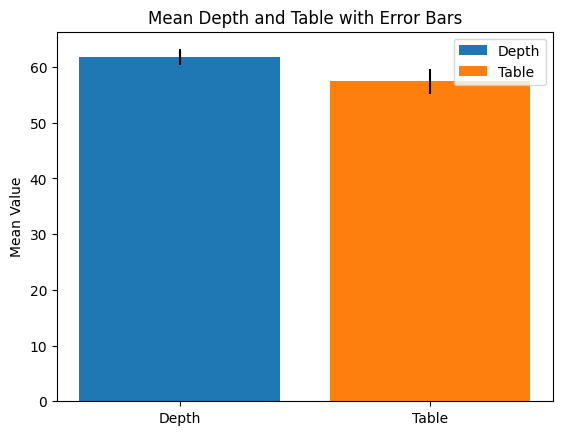

In [16]:
medals = pd.read_csv('../00_datasets/medals.csv', index_col=0)

fig, ax = plt.subplots()
ax.bar("Depth", df["depth"].mean(), label='Depth', yerr=df['depth'].std()) # yerr adds error bars
ax.bar("Table", df['table'].mean(), label='Table', yerr=df['table'].std())

ax.set_ylabel("Mean Value")
ax.set_title("Mean Depth and Table with Error Bars")
ax.legend() # Display the legend
plt.show()

## Histograms

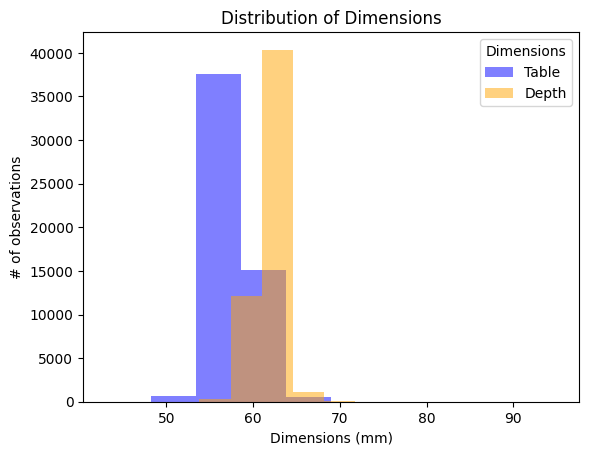

In [17]:
fig, ax = plt.subplots()

ax.hist(df['table'], bins=10, alpha=0.5, label='Table', color='blue')
ax.hist(df['depth'], bins=10, alpha=0.5, label='Depth', color='orange')

ax.set_xlabel("Dimensions (mm)")
ax.set_ylabel("# of observations")
ax.set_title("Distribution of Dimensions")
ax.legend(title='Dimensions')

plt.show()

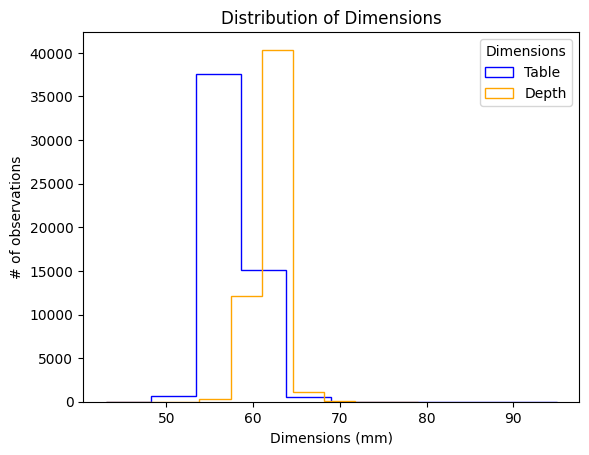

In [18]:
fig, ax = plt.subplots()

ax.hist(df['table'], bins=10, histtype='step', label='Table', color='blue') # default histtype is 'bar'
ax.hist(df['depth'], bins=10, histtype='step', label='Depth', color='orange') # default histtype is 'bar'

ax.set_xlabel("Dimensions (mm)")
ax.set_ylabel("# of observations")
ax.set_title("Distribution of Dimensions")
ax.legend(title='Dimensions')

plt.show()

## Boxplot

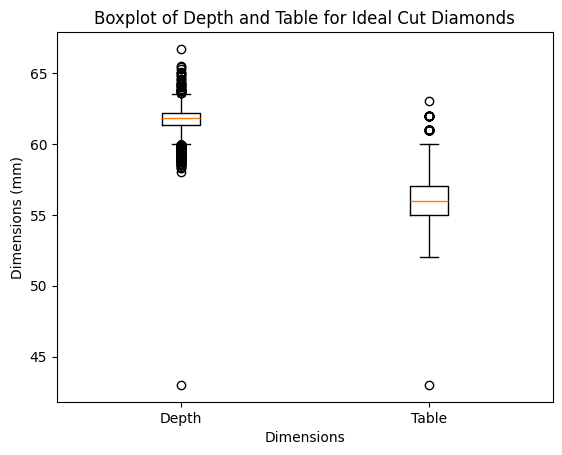

In [19]:
fig, ax = plt.subplots()

ideal_cut = df[df['cut']=='Ideal']

ax.boxplot([ideal_cut["depth"], ideal_cut["table"]])

ax.set_xticklabels(["Depth", "Table"])
ax.set_title("Boxplot of Depth and Table for Ideal Cut Diamonds")

ax.set_ylabel("Dimensions (mm)")
ax.set_xlabel("Dimensions")
# plt.grid(axis='y')  # Add horizontal grid lines for better readability

plt.show()

## Scatter plots

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


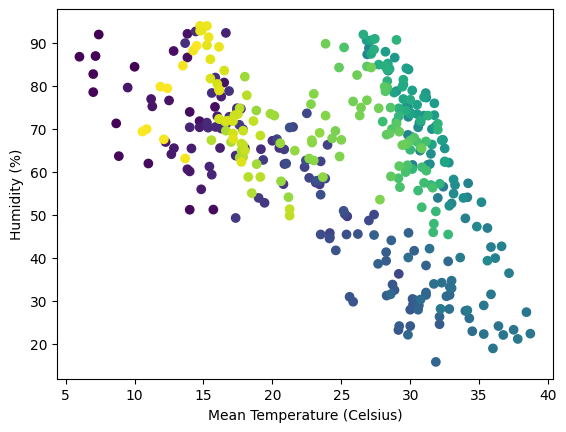

In [45]:
print(climate_change.head())
climate_change_2013 = climate_change["2013-01-01": "2013-12-31"] 
# climate_change_2013 = climate_change[climate_change.index.year == 2013] # # same as above

fig, ax = plt.subplots()

ax.scatter(climate_change_2013['meantemp'], 
           climate_change_2013['humidity'], 
           c=climate_change_2013.index, # color based on index (date) from dark blue to light yellow color
        #    s=climate_change_2013['meantemp'] # size based on mean temperature
           ) 
ax.set_xlabel("Mean Temperature (Celsius)")
ax.set_ylabel("Humidity (%)")
plt.show()

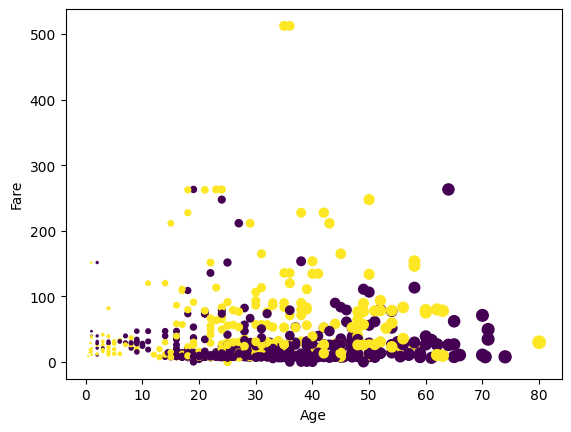

In [38]:
# read csv
titanic = pd.read_csv('../00_datasets/titanic.csv')
# drop all age rows with missing values
titanic.dropna(subset=['age'], inplace=True)

# create a scatter plot of age vs fare with color based on survival status
fig, ax = plt.subplots()

ax.scatter(titanic['age'], 
           titanic['fare'], 
        #    c=titanic['age'] # color based on age from dark blue to light yellow color
           c=titanic['survived'],
           s=titanic['age'] # size based on age, larger points for older passengers
           ) 
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
plt.show()

# Plots Theming

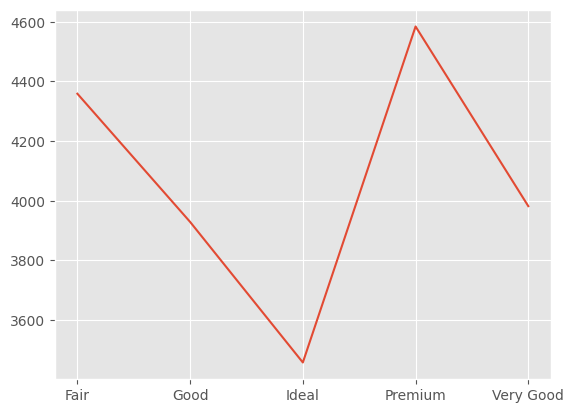

In [22]:
plt.style.use("ggplot") # use ggplot style
# plt.style.use("Solarize_Light2") # seaborn, dark_background, fivethirtyeight, classic, seaborn-whitegrid, seaborn-darkgrid, seaborn-poster, seaborn-talk
# plt.style.use("default")

cut_price_stats = df.groupby('cut')['price'].agg(['mean', 'median']).reset_index()
# print(cut_price_stats)

plt.plot(cut_price_stats['cut'], cut_price_stats['mean'], label='Mean Price')
plt.show()

## Save fig

/tmp/ipykernel_76918/3739890118.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(medals.index, rotation=90)


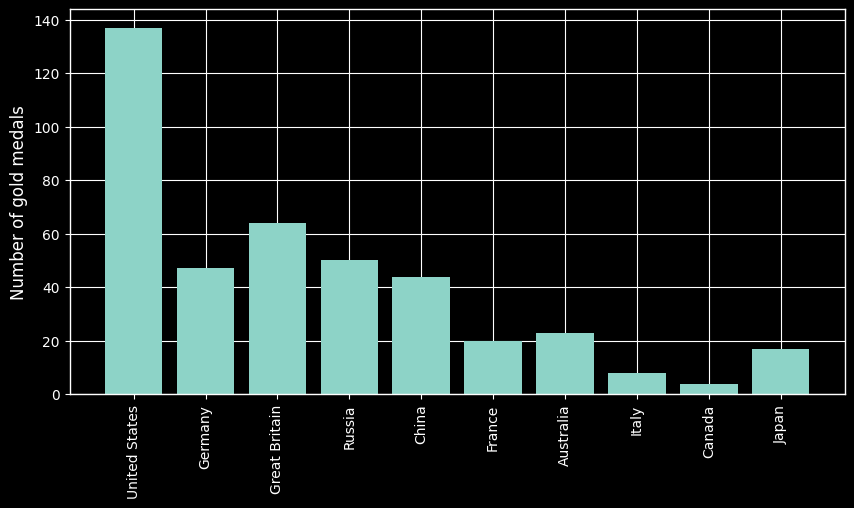

In [23]:
plt.style.use("dark_background") # use ggplot style

fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of gold medals")

# fig.show()

fig.savefig("./01_matplotlib_plots/medals_plot.png")
fig.savefig("./01_matplotlib_plots/medals_plot1.png", dpi=300) # 300 dpi means high resolution.

fig.set_size_inches([10, 5]) # set size of the figure
fig.savefig("./01_matplotlib_plots/medals_plot2.png")

